In [1]:
import numpy as np
import bandana as bd
import glob as g
from natsort import natsorted
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from imp import reload
reload(bd)

<module 'bandana' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\bandana\\__init__.py'>

In [3]:
fdir = r'../calculations/rubrene_1'

### Parsing HOMO and LUMO indices

In [4]:
nhomo, nlumo = bd.parser.parse_homo_lumo(fdir + r'/outfile')
print('HOMO index = {} \nLUMO index = {}'.format(nhomo, nlumo))

HOMO index = 1123 
LUMO index = 1125


### Parsing and symmetrizing the band structure

In [5]:
files = natsorted(g.glob(fdir + r'/*.out'))

In [6]:
bands = []
for bid in tqdm(range(nhomo, nhomo-64, -4)):
    bands.append(bd.parser.parse_bands(files, bid).tolist())

bands = np.asarray(bands)

100%|█████████████████████████████████████████████████████████████| 16/16 [00:13<00:00,  1.22it/s]


In [7]:
bands.shape

(16, 51, 10)

In [8]:
padbands = bd.parser.sympad(bands, ((0, 0), (150, 100), (50, 50)))

### Band structure surface visualization

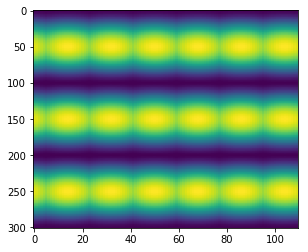

In [9]:
plt.imshow(padbands[0,...], aspect=0.3)

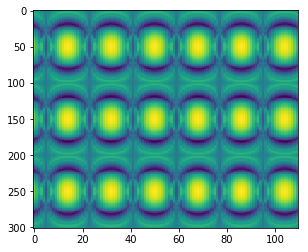

In [10]:
plt.imshow(padbands[10,...], aspect=0.3)

In [11]:
bd.plotter.bandplot3d(padbands, range(0, 8), fname='rubrene_vb_')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



The draw time for this plot will be slow for clients without much RAM.
